In [1]:
%cd ..

/home/jairo/Documentos/GitHub/parallel-kink-scattering


/home/jairo/Documentos/GitHub/parallel-kink-scattering/.env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from modules.numeric import *

In [3]:
phi4 = Phi4()

L = 200
N = 2048
DX = 2*L/(N - 1)
DT = 4e-2
X0 = 10

In [4]:
def init(x, v):
    return np.stack([
        phi4.kink(x + X0, t=0, v=v) - phi4.kink(x - X0, t=0, v=-v) - 1,
        phi4.kink_dt(x + X0, t=0, v=v) - phi4.kink_dt(x - X0, t=0, v=-v)
    ])

In [5]:
reflective = Reflective(order=4)

collider = Wave(
    x_grid= (-L/2, L/2, N), 
    dt= DT, 
    order= 4,
    y0= init,
    F= phi4.diff,
    boundaries= (reflective, reflective),
    integrator= 'rk4',
)

In [7]:
grid, Y = collider.run(200, v=0.2)

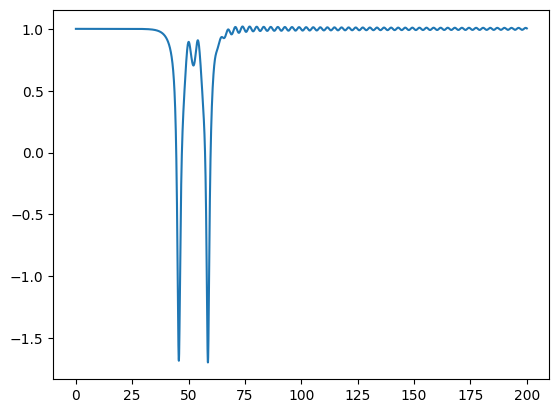

In [8]:
plt.plot(grid.t, Y[:, 0, grid.at(x=0)[1]])

(-40.0, 40.0)

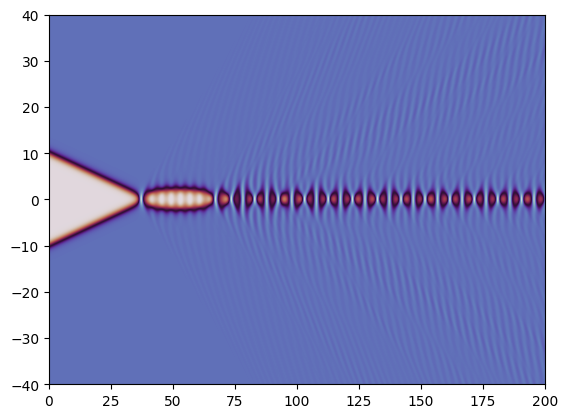

In [45]:
plt.imshow(Y[:, 0].T, origin='lower', extent=grid.extent(), aspect='auto', cmap='twilight')
plt.ylim(-40, 40)